# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qsim.utils.utils import *
generate_plot_params()
from qsim.physical_gate.cnot import *

In [3]:
from qsim.utils.quantum_guidelines import *
from qsim.utils.utils import *

global_setup()

%matplotlib inline

Setup methods loaded


## Leakage during one CNOT

In [27]:
distance = 3
nbar = 4
k2d = 1
k2a = 1
k1d = 1e-3
k1a = k1d * k2a
gate_time = 1
print(f"{gate_time=:.3f}")

N_data = 10
N_ancilla = 10
basis = SFB(nbar=nbar, d=N_data, d_ancilla=N_ancilla)
# N_l = range(5, 13)
N_l = [10]

gate_time=1.000


In [29]:
%%time
leakage_l = []
N = 7

print(f"{N=}")
N_data = N
N_ancilla = N
basis = SFB(nbar=nbar, d=N_data, d_ancilla=N_ancilla)
# Id0
initial_state = tensor(
    0.5 * (ket2dm(basis.ancilla.zero) + ket2dm(basis.ancilla.one)),
    ket2dm(basis.data.zero),
)

# for i in range(5):

cnot = CNOTSFB(
    nbar=nbar,
    k2=k2d,
    k2a=k2a,
    k1=k1d,
    k1a=k1a,
    gate_time=gate_time,
    truncature=N_data,
    N_ancilla=N_ancilla,
    initial_state=initial_state,
    initial_state_name="Id0"
    # kphi=1e-4,
)
res = cnot.simulate()
proj_data = proj_code_space_sfb(N_data)
leakage = 1 - np.real(
    np.trace(cnot.rho * tensor(qeye([2, N_ancilla]), proj_data))
)
print(f"{leakage=}")
leakage_l.append(leakage)
# initial_state = cnot.rho

N=7
leakage=0.007113262029517342
CPU times: user 1min 4s, sys: 12.5 s, total: 1min 17s
Wall time: 9.94 s


In [18]:
N = 6
nbar = 4
k2d = 1
k1d = 1e-3
k2a_l = [i for i in range(1, 11)] + [15, 20]

In [ ]:
leakage_data = []
leakage_anc = []
z1_l = []
z2_l = []
z1z2_l = []
N_l = k2a_l
for k2a in k2a_l:
    print(k2a)
    k1a = k1d * k2a
    # gate_time = optimal_gate_time(nbar, k1d, k2d)
    gate_time = 1 / k2a
    print(f"{N=}")
    N_data = N
    N_ancilla = N
    basis = SFB(nbar=nbar, d=N_data, d_ancilla=N_ancilla)
    # +0
    initial_state = tensor(
        ket2dm(basis.ancilla.evencat),
        ket2dm(basis.data.evencat),
    )
    P_data = proj_code_space_sfb(N=N)
    P_Z1 = tensor(
        ket2dm((fock(2, 0) - fock(2, 1)).unit()),
        qeye(N),
        ket2dm((fock(2, 0) + fock(2, 1)).unit()),
        # qeye(2),
        qeye(N),
    )
    P_Z2 = tensor(
        ket2dm((fock(2, 0) + fock(2, 1)).unit()),
        qeye(N),
        ket2dm((fock(2, 0) - fock(2, 1)).unit()),
        # qeye(2),
        qeye(N),
    )

    P_Z1Z2 = tensor(
        ket2dm((fock(2, 0) - fock(2, 1)).unit()),
        qeye(N),
        ket2dm((fock(2, 0) - fock(2, 1)).unit()),
        # qeye(2),
        qeye(N),
    )

    # for i in range(5):
    cnot = CNOTSFBPhaseFlips(
        nbar=nbar,
        k2=k2d,
        k2a=k2a,
        k1=k1d,
        k1a=k1a,
        gate_time=gate_time,
        truncature=N_data,
        N_ancilla=N_ancilla,
        initial_state=initial_state,
        initial_state_name="++"
        # kphi=1e-4,
    )
    res = cnot.simulate()

    ld = 1 - np.trace(np.real(P_data * cnot.rho.ptrace((2, 3))))
    leakage_data.append(ld)

    la = 1 - np.trace(np.real(P_data * cnot.rho.ptrace((0, 1))))
    leakage_anc.append(la)

    pZ1 = np.trace(np.real(P_Z1 * cnot.rho))
    z1_l.append(pZ1)
    pZ2 = np.trace(np.real(P_Z2 * cnot.rho))
    z2_l.append(pZ2)
    pZ1Z2 = np.trace(np.real(P_Z1Z2 * cnot.rho))
    z1z2_l.append(pZ1Z2)
    print(ld)
    print(la)
    print(pZ1)
    print(pZ2)
    print(pZ1Z2)

/var/folders/3s/nd608nl93j95yq_q9rfr02hc00m8zh/T/ipykernel_16544/1101125200.py:24: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_x_axes().join(ax1, ax2)


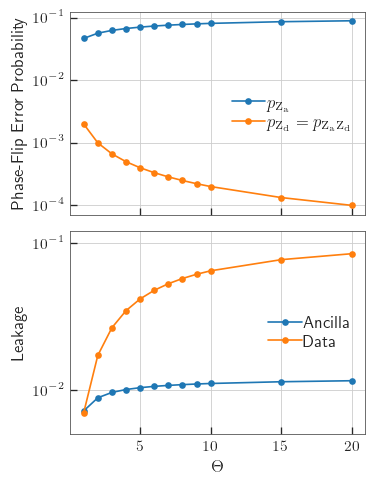

In [13]:
from qsim.utils.quantum_guidelines import *
import matplotlib.pyplot as plt

props = global_setup(columns="twocolumn", paper="a4paper")
%matplotlib inline

plt.rcParams.update(
    {
        'legend.fontsize': 10,
    }
)

fig = plot_setup(aspect_ratio=2 / 1.4 * 0.9)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
# N_l = range(2, 9)
N_l = k2a_l
ax2.plot(N_l, leakage_anc, 'o-', label='Ancilla')
ax2.plot(N_l, leakage_data, 'o-', label='Data')

ax1.plot(N_l, z1_l, 'o-', label='$p_{\mathrm{Z_a}}$')
ax1.plot(N_l, z2_l, 'o-', label='$p_{\mathrm{Z_d}} = p_{\mathrm{Z_aZ_d}}$')

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

ax2.set_ylim(5e-3, 1.2e-1)
# ax2.set_xlabel("$\\kappa_{{2}}^a / \\kappa_{{2}}^d$")
ax2.set_xlabel("$\\Theta$")
ax2.set_ylabel("Leakage")
ax1.set_ylabel("Phase-Flip Error Probability")
# ax1.text(x=-0.15, y=1, s='a', transform=ax1.transAxes, fontweight='extra bold')
# ax2.text(x=-0.15, y=1, s='b', transform=ax2.transAxes, fontstyle='italic')
for ax in [ax1, ax2]:
    ax.set_yscale('log')
    ax.grid()
    ax.legend(frameon=False, handletextpad=0.08, labelspacing=0.2)

plt.tight_layout(pad=1)
plt.savefig(f"CNOT_em_vs_asym.pdf")
# generate_ax_params(ax)
plt.show()

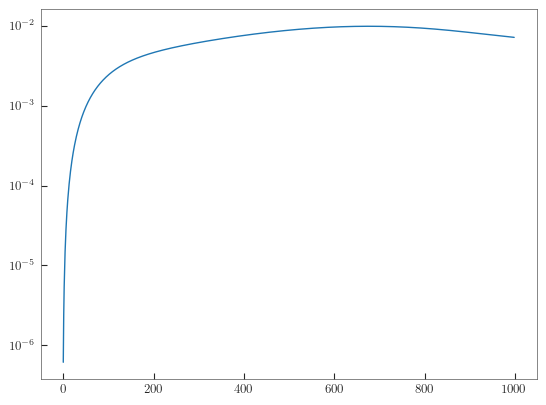

In [30]:
fig = plt.figure(facecolor="white")
plt.semilogy(cnot.leakage_l)

In [31]:
initial_state_idle = cnot.rho.ptrace((2, 3))
initial_state_idle.dims

[[2, 7], [2, 7]]

### Idle gate for reconvergence

In [32]:
from qsim.physical_gate.idle import IdleGateSFB

basis = SFB(nbar=nbar, d=N_data)

idle = IdleGateSFB(
    nbar=nbar,
    k2=k2d,
    k1=k1d,
    gate_time=gate_time,
    truncature=N_data,
    initial_state=initial_state_idle,
    initial_state_name="CNOT_Id0"
    # kphi=1e-4,
)
res_idle = idle.simulate()

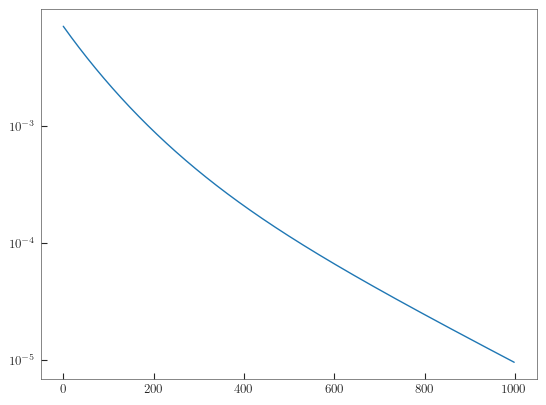

In [34]:
fig = plt.figure(facecolor="white")

plt.semilogy(
    np.ones(idle.results_mesolve.expect[1].shape)
    - idle.results_mesolve.expect[1]
)

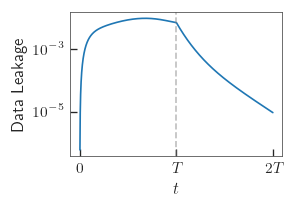

In [38]:
from qsim.utils.quantum_guidelines import *

import matplotlib.pyplot as plt


props = global_setup(columns="twocolumn", paper="a4paper", fontsize=11)
%matplotlib inline
fig = plot_setup(width_ratio=0.7, aspect_ratio=1 / 1.46)
ax = fig.add_subplot()

concatenated = np.concatenate(
    (
        np.array(cnot.leakage_l),
        np.ones(idle.results_mesolve.expect[1].shape)
        - idle.results_mesolve.expect[1],
    ),
    axis=0,
)

x = np.linspace(0, 2, len(concatenated))

ax.set_yscale("log")
ax.axvline(1, linestyle="--", color="grey", alpha=0.5)
# plt.xlabel("$\\kappa_2 t$")
plt.xlabel("$t$")
plt.xticks([0, 1, 2], ['$0$', '$T$', '$2T$'])
plt.ylabel("Data Leakage")
ax.legend(handletextpad=0.08, labelspacing=0.2, frameon=False)
plt.tight_layout(pad=0.)
# generate_ax_params(ax)
plt.savefig("leakage_cnot_reconvergence.pdf")
plt.show()